### Thallys Oliveira - 11819827

Questão 2 - Lista 3

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

A imagem coins.jpg contém diversas moedas uma ao lado da outra. Suponha que você possua um algoritmo que consiga contar quantas moedas existem na imagem. No entanto, ele só consegue contar se a imagem estiver binarizada e, mais ainda, nela não haja conexão de uma moeda com a outra.

1. Leia a imagem coins.jpg e a transforme para escala de cinza.
2. Utilizando o método de OTSU, faça a binarização desta imagem.
3. Investique um elemento estruturante adequado para realizar a erosão da imagem. Lembre-se: seu objetivo é separar as moedas para que o seu algoritmo de contagem consiga realizar o trabalho de contagem.
4. Comente os resultados.

In [161]:
# Local da Imagem
local_coins = "/home/thallys/Documentos/Graduação/Visão Computacional/Visao_computacional/Lista 3 /Arquivos/coins.jpg"

# Lendo a imagem em tons de cinza
img_coins = cv.imread(local_coins, 0)

# Binarizando a Imagem
th_value,img_coins_bi= cv.threshold(img_coins, 0, 255,cv.THRESH_OTSU)

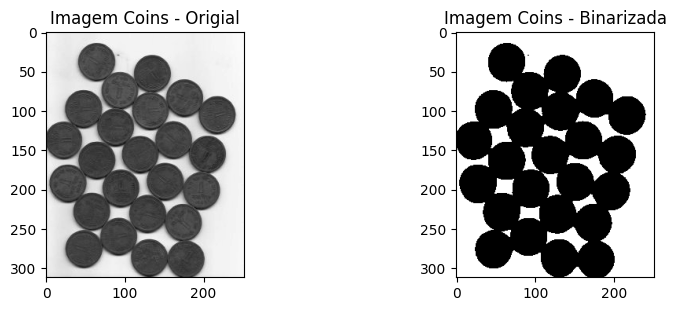

In [162]:
# Plotando Imagens
plt.figure(figsize=(15, 7)) 

plt.subplot(2,3,1)
plt.imshow(img_coins, cmap='gray')
plt.title('Imagem Coins - Origial')

plt.subplot(2,3,2)
plt.imshow(img_coins_bi, cmap='gray')
plt.title('Imagem Coins - Binarizada')

plt.show()

In [163]:
elem_estru_1 = cv.getStructuringElement(cv.MORPH_CROSS,(23,23))
elem_estru_2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(18,18))
erode_cruz = cv.erode(img_coins_bi, elem_estru_1, iterations = 1)
erode_elipse = cv.erode(img_coins_bi, elem_estru_2, iterations = 1)

dif_img_erodecruz = np.bitwise_and(img_coins_bi,~erode_cruz)   # Diferença A-B
dif_img_erodeelipse = np.bitwise_and(img_coins_bi,~erode_elipse)   # Diferença A-B

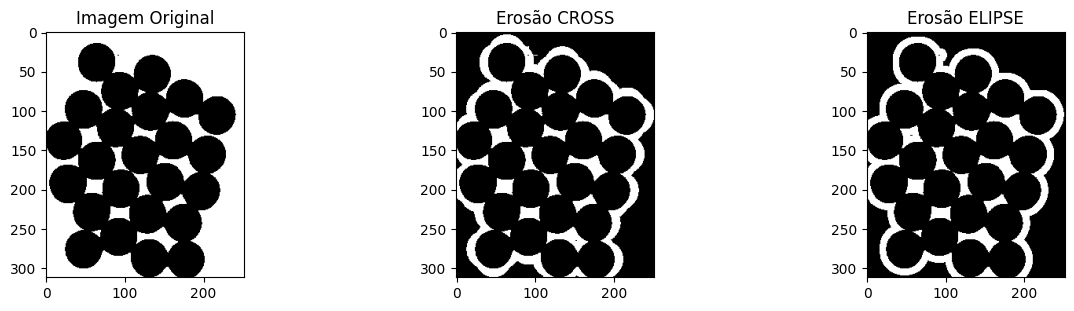

In [164]:
plt.figure(figsize=(15, 7)) 

plt.subplot(2,3,1)
plt.imshow(img_coins_bi, cmap='gray')
plt.title('Imagem Original')

plt.subplot(2,3,2)
plt.imshow(dif_img_erodecruz, cmap='gray')
plt.title('Erosão CROSS')

plt.subplot(2,3,3)
plt.imshow(dif_img_erodeelipse, cmap='gray')
plt.title('Erosão ELIPSE')

plt.show()

### Comentário:

Visando separar as moedas, adotamos dois elementos estruturantes, a cruz e a elipse. Adotando tamanho de 23x23 para a cruz e 18x18 para elipse, encontramos resultados semelhantes. No qual, é possível contar a quantidade de moedas. 

